#Data preprocessing

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")


data.head(10)



FileNotFoundError: [Errno 2] No such file or directory: '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [2]:
data.shape

(7043, 21)

In [3]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
data_rem = data.drop('customerID', axis=1)
data_rem.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Normalizing ordinal categorical by label encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_enc = LabelEncoder()
data_rem['Partner'] = label_enc.fit_transform(data_rem['Partner'].astype(str))
data_rem['Dependents'] = label_enc.fit_transform(data_rem['Dependents'].astype(str))
data_rem['PhoneService'] = label_enc.fit_transform(data_rem['PhoneService'].astype(str))
data_rem['PaperlessBilling'] = label_enc.fit_transform(data_rem['PaperlessBilling'].astype(str))
data_rem['Churn'] = label_enc.fit_transform(data_rem['Churn'].astype(str))
data_rem['MultipleLines'] = label_enc.fit_transform(data_rem['MultipleLines'].astype(str))
data_rem['OnlineSecurity'] = label_enc.fit_transform(data_rem['OnlineSecurity'].astype(str))
data_rem['OnlineBackup'] = label_enc.fit_transform(data_rem['OnlineBackup'].astype(str))
data_rem['DeviceProtection'] = label_enc.fit_transform(data_rem['DeviceProtection'].astype(str))
data_rem['TechSupport'] = label_enc.fit_transform(data_rem['TechSupport'].astype(str))
data_rem['StreamingTV'] = label_enc.fit_transform(data_rem['StreamingTV'].astype(str))
data_rem['StreamingMovies'] = label_enc.fit_transform(data_rem['StreamingMovies'].astype(str))

data_rem

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,1,DSL,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,1,DSL,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,2,DSL,2,0,2,2,2,2,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,2,Fiber optic,0,2,2,0,2,2,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,1,DSL,2,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,2,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [7]:
#Normalizing nominal data by one hot encoder
from sklearn.preprocessing import OneHotEncoder
nominal_cols = ['gender','InternetService','Contract','PaymentMethod']

enc = OneHotEncoder(drop='first', sparse=False)
enc_data = enc.fit_transform(data_rem[nominal_cols])
enc_columns = enc.get_feature_names_out(input_features=nominal_cols)
data_encode = pd.DataFrame(enc_data, columns=enc_columns)
data_encode

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
data_encode_fin = pd.concat([data_rem.drop(nominal_cols, axis=1), data_encode], axis=1)
data_enc=data_encode_fin.dropna()
data_enc.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,2,0,0,...,29.85,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,2,0,2,0,...,1889.5,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,2,2,0,0,...,108.15,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,2,0,2,2,...,1840.75,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#normalizing numerical data
numerical_cols=['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import StandardScaler
data_enc['TotalCharges'] = pd.to_numeric(data_enc['TotalCharges'], errors='coerce', downcast='float')
scaler=StandardScaler()
data_enc[numerical_cols]= scaler.fit_transform(data_enc[numerical_cols])

data_enc


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.277445,0,1,0,2,0,0,...,-0.994194,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0.066327,1,0,2,0,2,0,...,-0.173740,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,-1.236724,1,0,2,2,0,0,...,-0.959649,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0.514251,0,1,2,0,2,2,...,-0.195248,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,-1.236724,1,0,0,0,0,0,...,-0.940457,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,-0.340876,1,2,2,0,2,2,...,-0.129180,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0,1,1,1.613701,1,2,0,2,2,0,...,2.241056,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0,1,1,-0.870241,0,1,2,0,0,0,...,-0.854514,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,0,-1.155283,1,2,0,0,0,0,...,-0.872095,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
data_enc = data_enc.dropna()

In [11]:
print("Missing Values:")
print(data_enc.isnull().sum())

Missing Values:
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check        

#Exploratory data analysis (EDA)

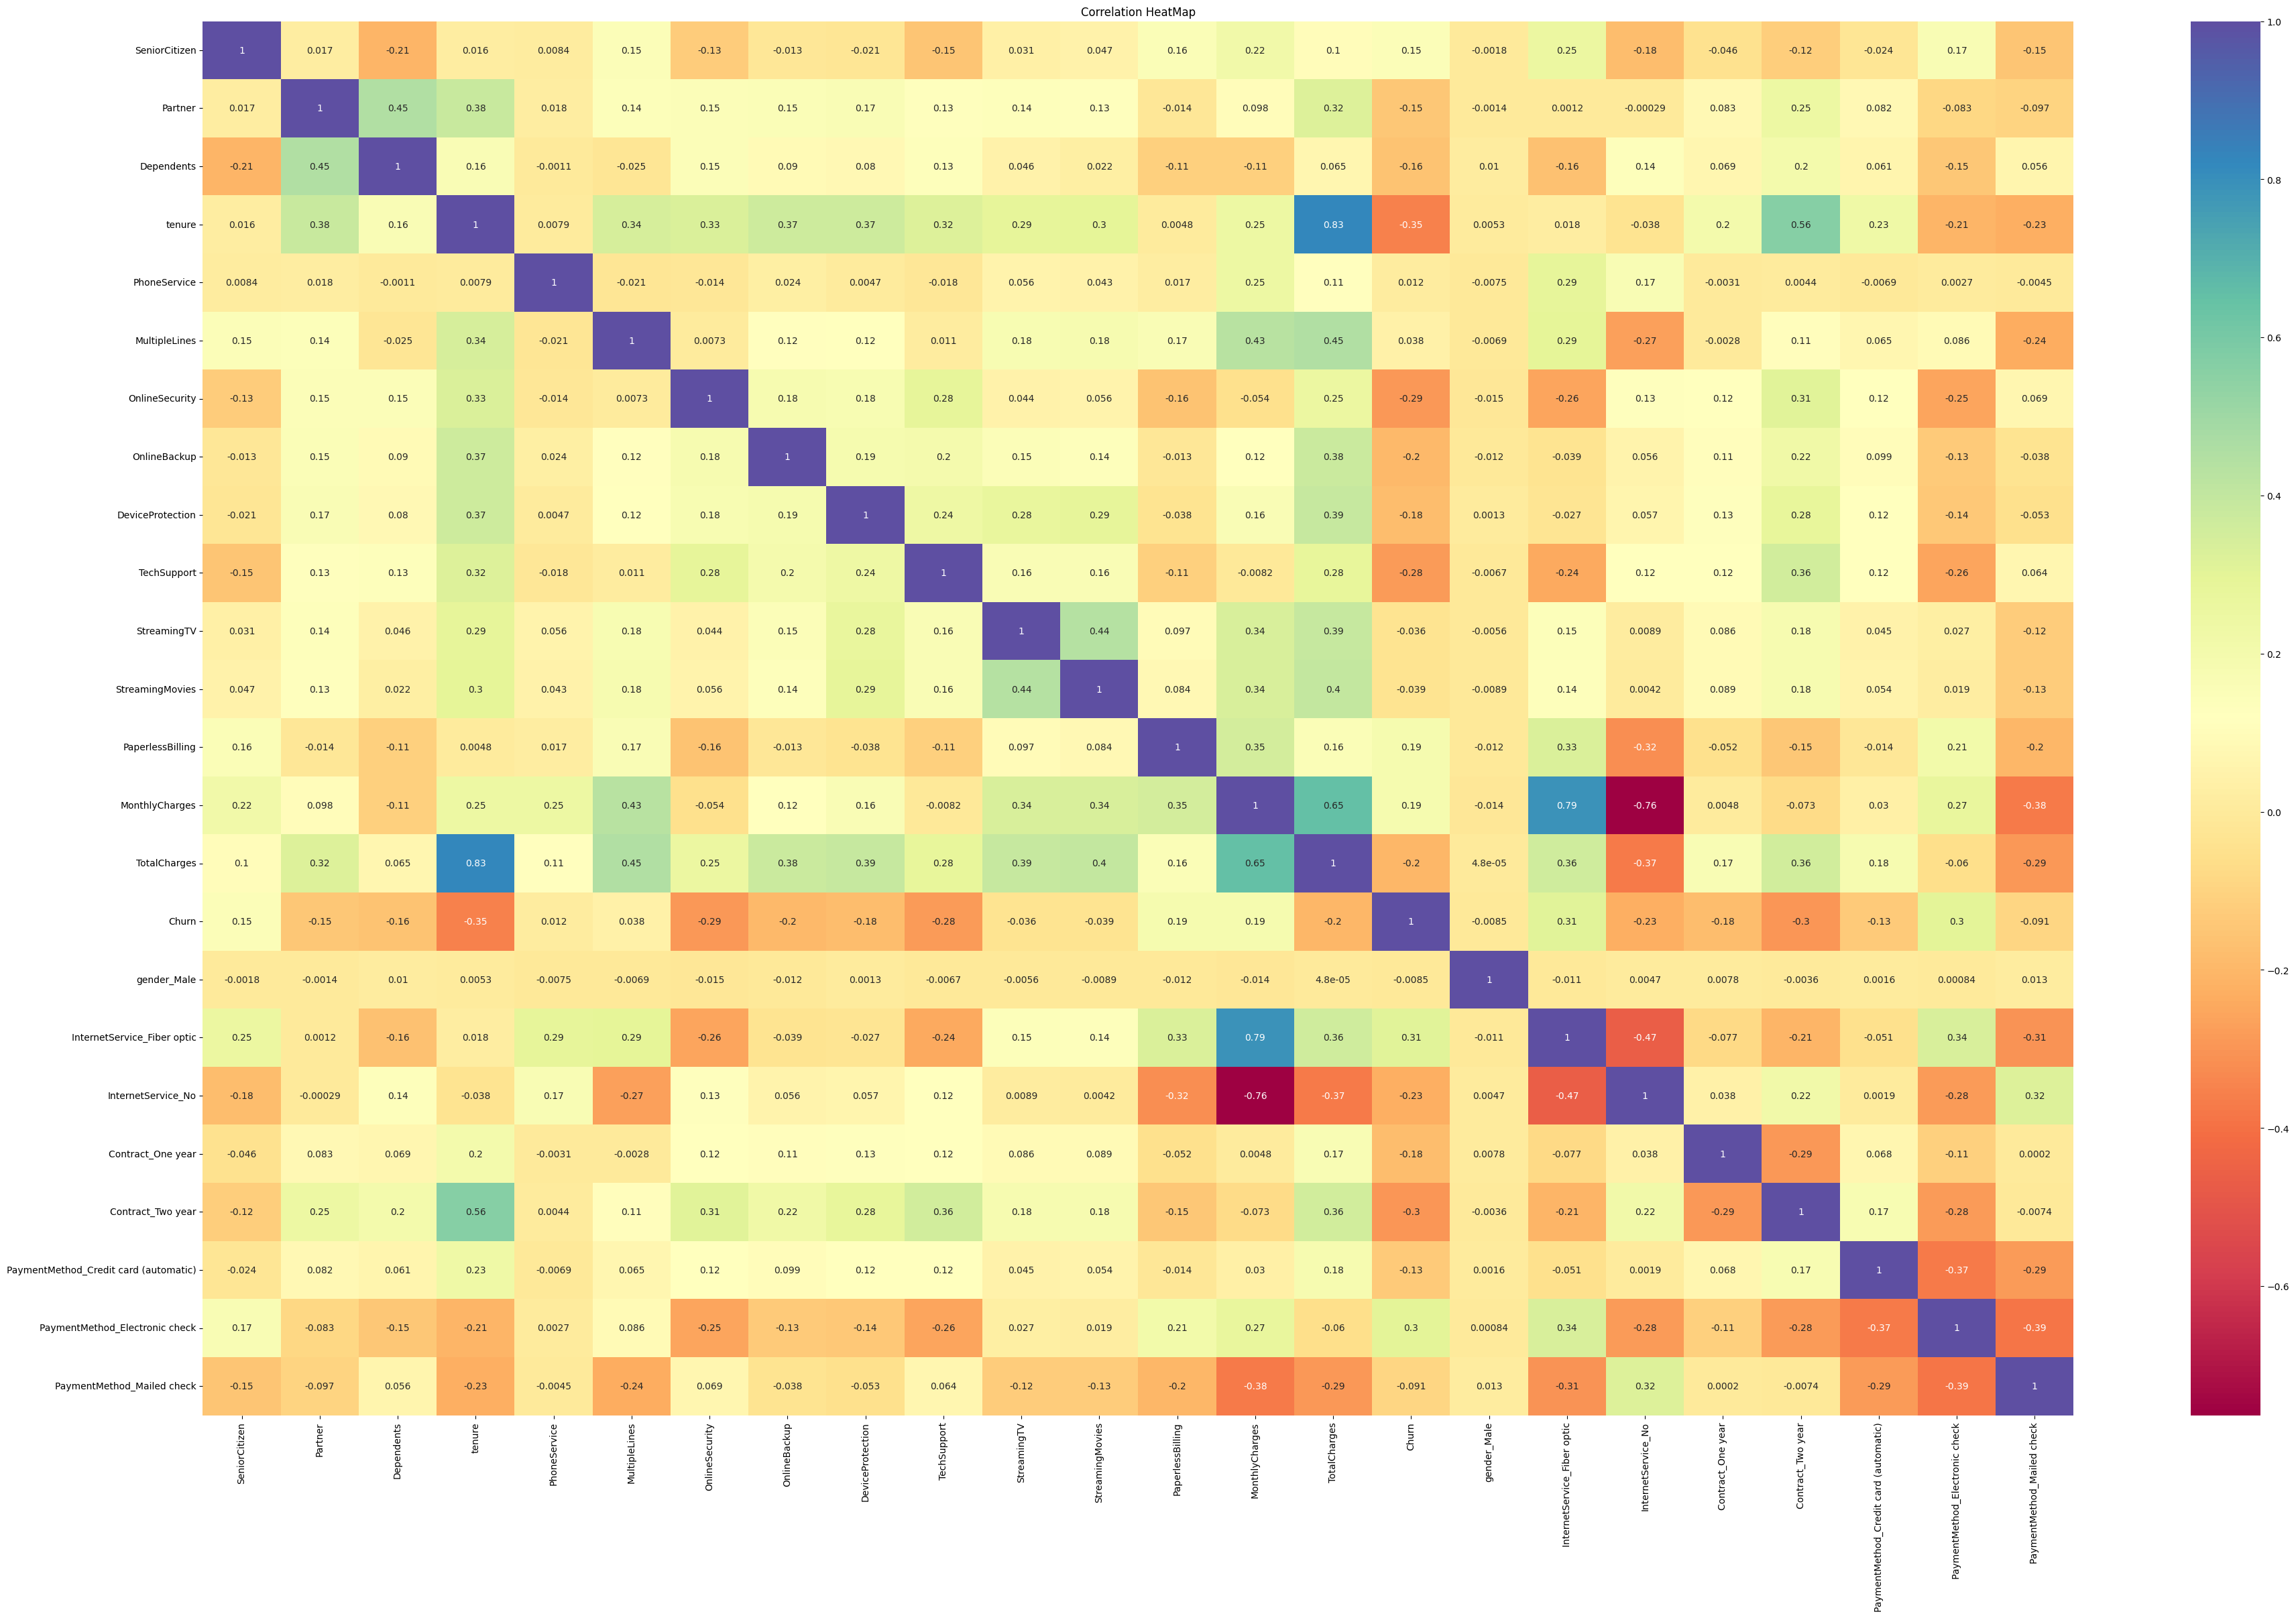

Second-largest correlation coefficient with 'Churn': 0.3540493589532519
Feature associated with the second-largest correlation coefficient: tenure


In [13]:
# exploitary data analysis
import matplotlib.pyplot as plt
import seaborn as sns
data_corr = data_enc.corr()
plt.figure(figsize= (45,27))
sns.heatmap(data_corr,annot = True ,cmap='Spectral')
plt.title('Correlation HeatMap')
plt.show()


# Find the second-largest correlation coefficient with "Churn" column
churn_corr = data_corr['Churn'].abs().sort_values(ascending=False)
second_largest_corr = churn_corr.iloc[1]

# Find the feature associated with the second-largest correlation coefficient
second_largest_corr_feature = churn_corr[churn_corr == second_largest_corr].index[0]

print("Second-largest correlation coefficient with 'Churn':", second_largest_corr)
print("Feature associated with the second-largest correlation coefficient:", second_largest_corr_feature)


<Figure size 2400x1800 with 0 Axes>

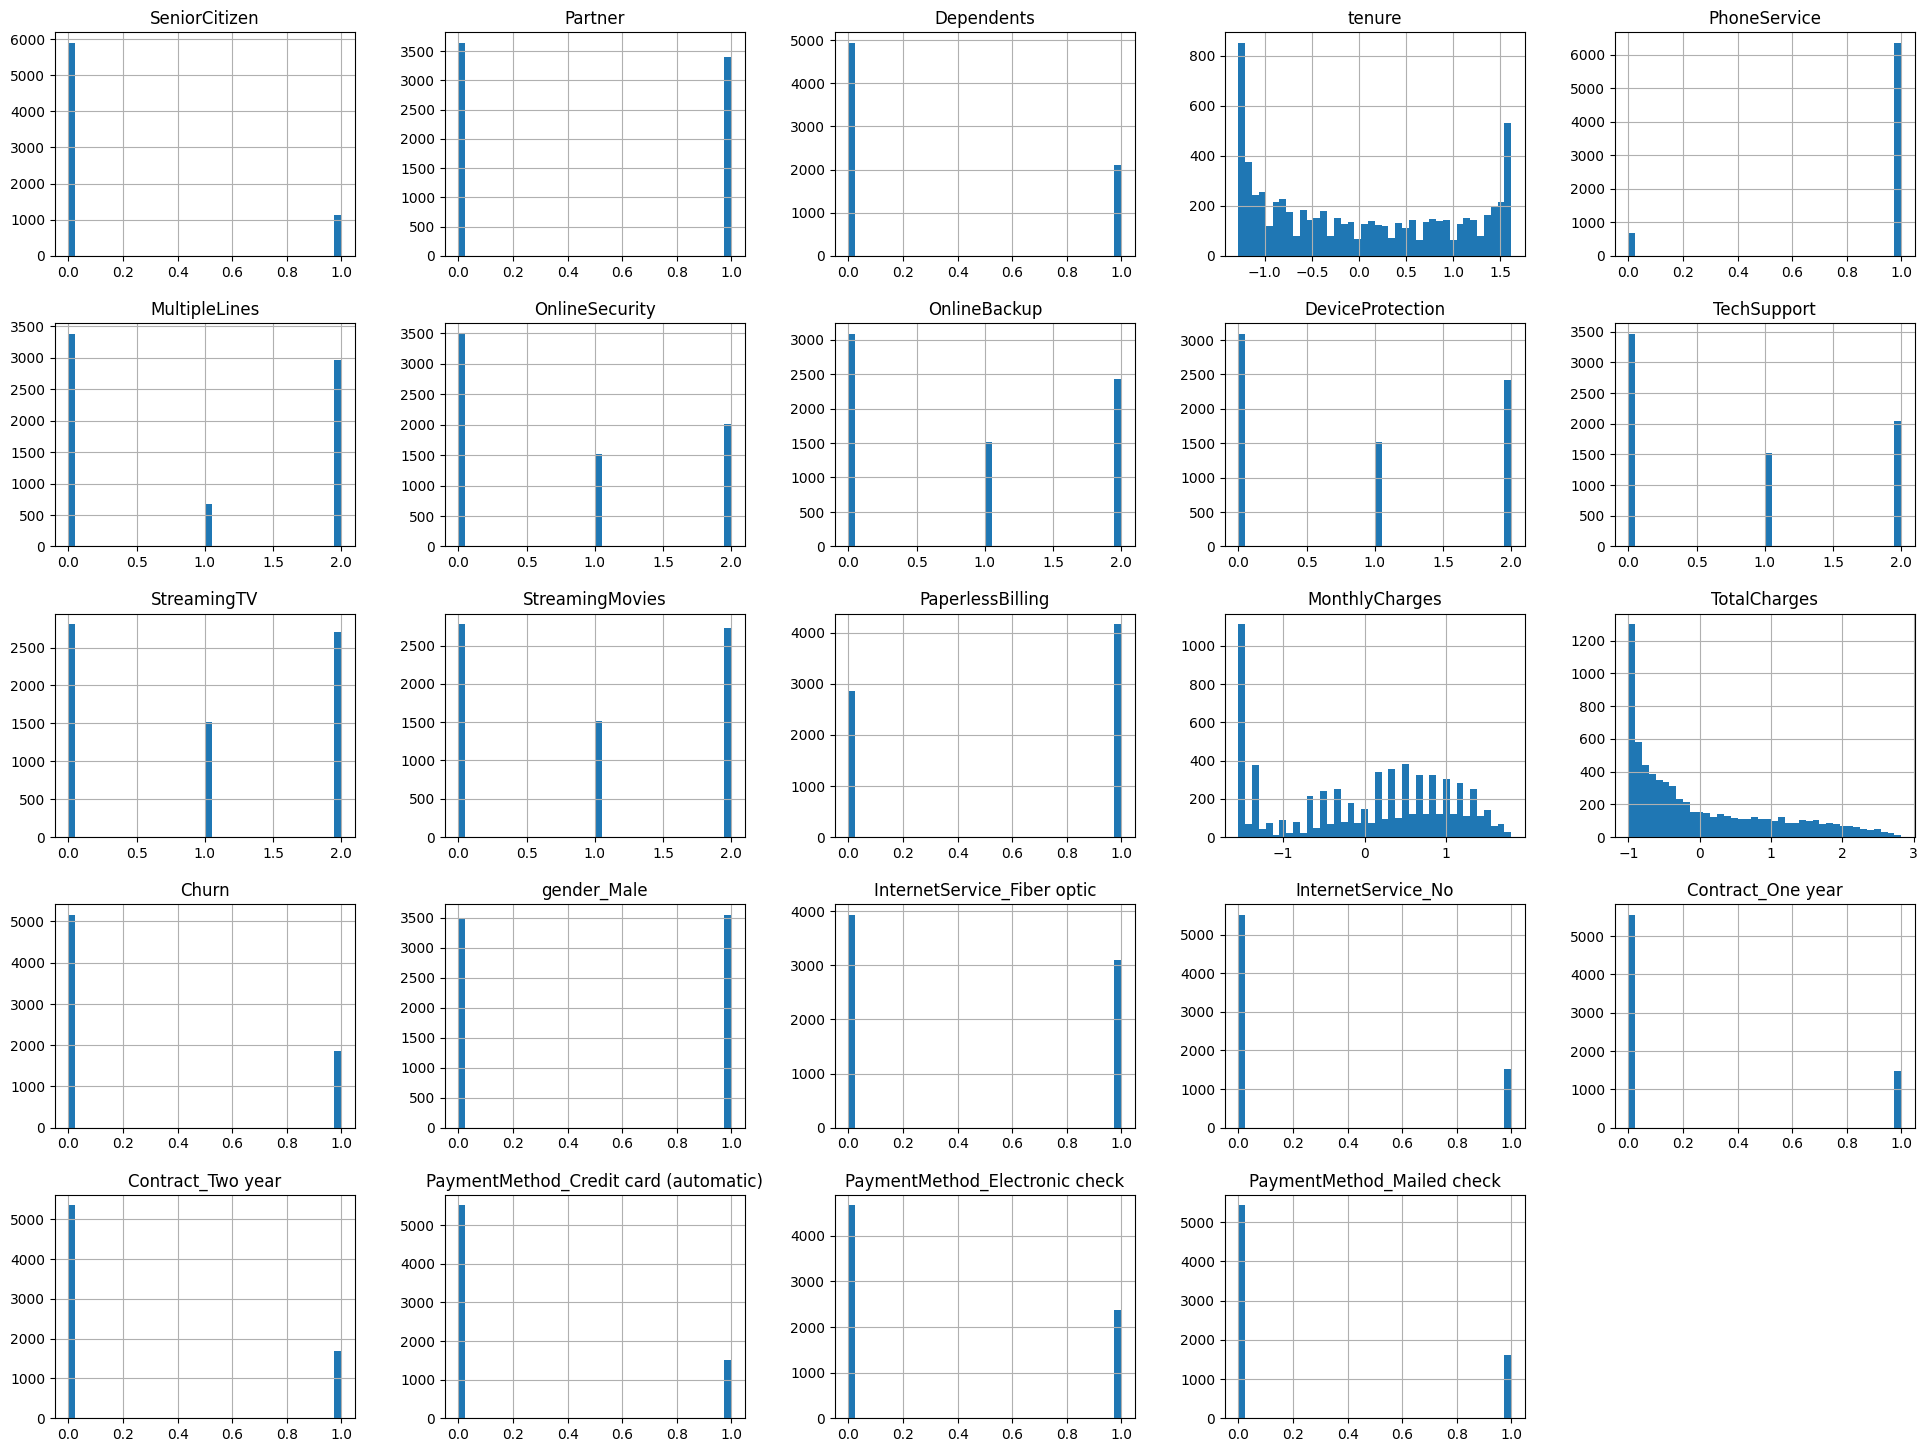

In [14]:
plt.figure(figsize=(24,18)) #width =24, and height =18
data_enc.hist(bins=40,figsize=(24,18))
plt.show()

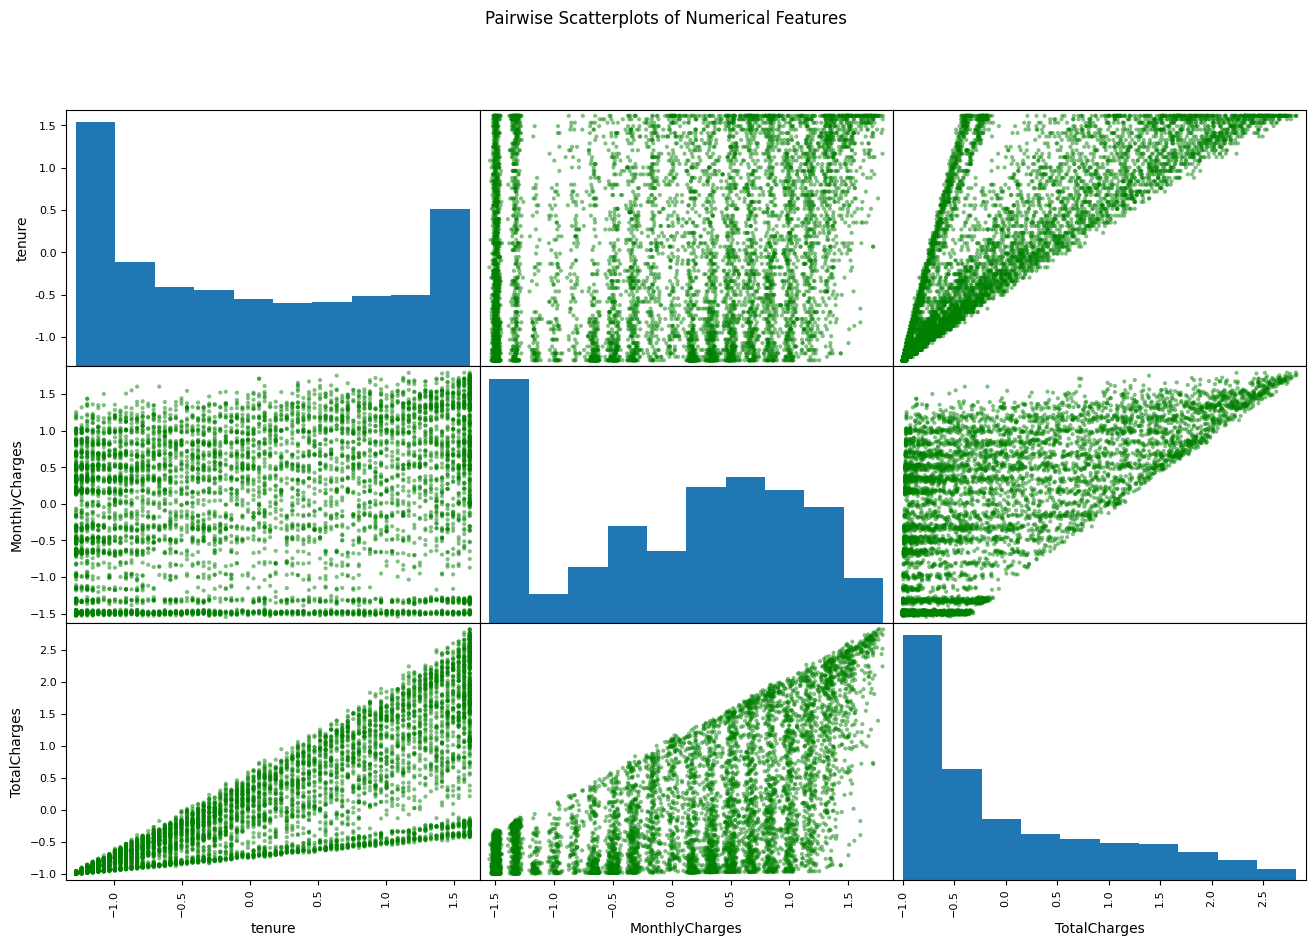

In [15]:
# Pairwise scatterplots for numerical features

pd.plotting.scatter_matrix(data_enc[['tenure', 'MonthlyCharges', 'TotalCharges']], figsize=(16, 10),color=['green'])
plt.suptitle('Pairwise Scatterplots of Numerical Features')
plt.show()


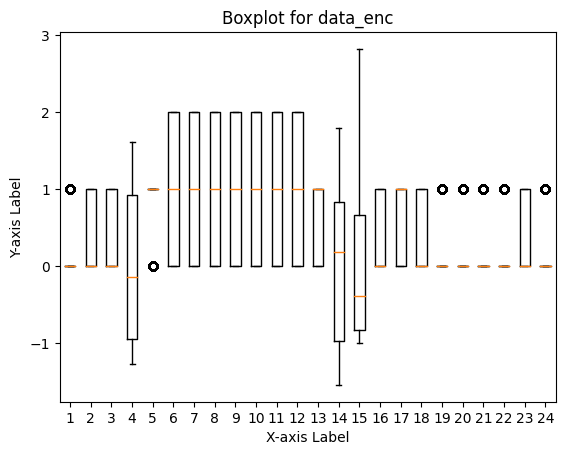

In [16]:
# Create a boxplot
plt.boxplot(data_enc)

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Boxplot for data_enc')

# Show the plot
plt.show()

In [17]:
#Train test split

from sklearn.utils import validation
from sklearn.model_selection import train_test_split

X = data_enc.drop(['Churn'], axis=1)
y = data_enc['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)


In [18]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1010,0,0,0,-1.196004,1,0,2,0,0,0,...,-0.485633,-0.936399,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2732,0,0,1,-1.155283,1,0,1,1,1,1,...,-1.474403,-0.965671,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2940,1,0,0,0.840014,0,1,0,2,2,0,...,-0.342719,0.252028,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
859,0,1,1,1.613701,0,1,2,2,2,2,...,0.001273,1.074931,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2895,0,1,0,0.188489,1,0,1,1,1,1,...,-1.492682,-0.690812,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,0.514251,1,2,1,1,1,1,...,-1.291605,-0.470615,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3934,0,0,1,-0.910961,0,1,2,2,0,2,...,-0.814669,-0.825837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5964,0,1,1,0.677133,1,0,2,0,2,2,...,-0.100096,0.326853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6947,0,1,1,1.450820,1,2,0,2,0,0,...,1.206076,1.979696,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [19]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,0,0,0,-0.340876,1,0,0,0,0,0,...,0.501474,-0.124547,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3730,0,1,0,1.002896,1,2,0,2,2,0,...,1.320740,1.605062,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1761,0,0,0,1.043616,1,2,1,1,1,1,...,-1.339797,-0.339582,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2283,0,0,0,-1.277445,1,0,0,0,0,0,...,0.225616,-0.975797,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1872,0,1,1,0.351370,1,0,1,1,1,1,...,-1.497668,-0.652539,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,0,1,0,-1.196004,0,1,0,0,0,2,...,-1.158661,-0.966664,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2103,1,1,0,-0.870241,1,0,0,0,0,0,...,0.180747,-0.639104,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4855,0,1,0,1.287938,1,0,2,2,0,2,...,1.305784,1.906922,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4927,0,1,0,-0.096554,1,0,1,1,1,1,...,-1.519271,-0.726084,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [20]:
print(X_train.dtypes)

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                              float64
InternetService_Fiber optic              float64
InternetService_No                       float64
Contract_One year                        float64
Contract_Two year                        float64
PaymentMethod_Credit

In [21]:
#Implementing PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2)
X_red = tsne.fit_transform(X_pca)

In [22]:
colors=['orange','green']

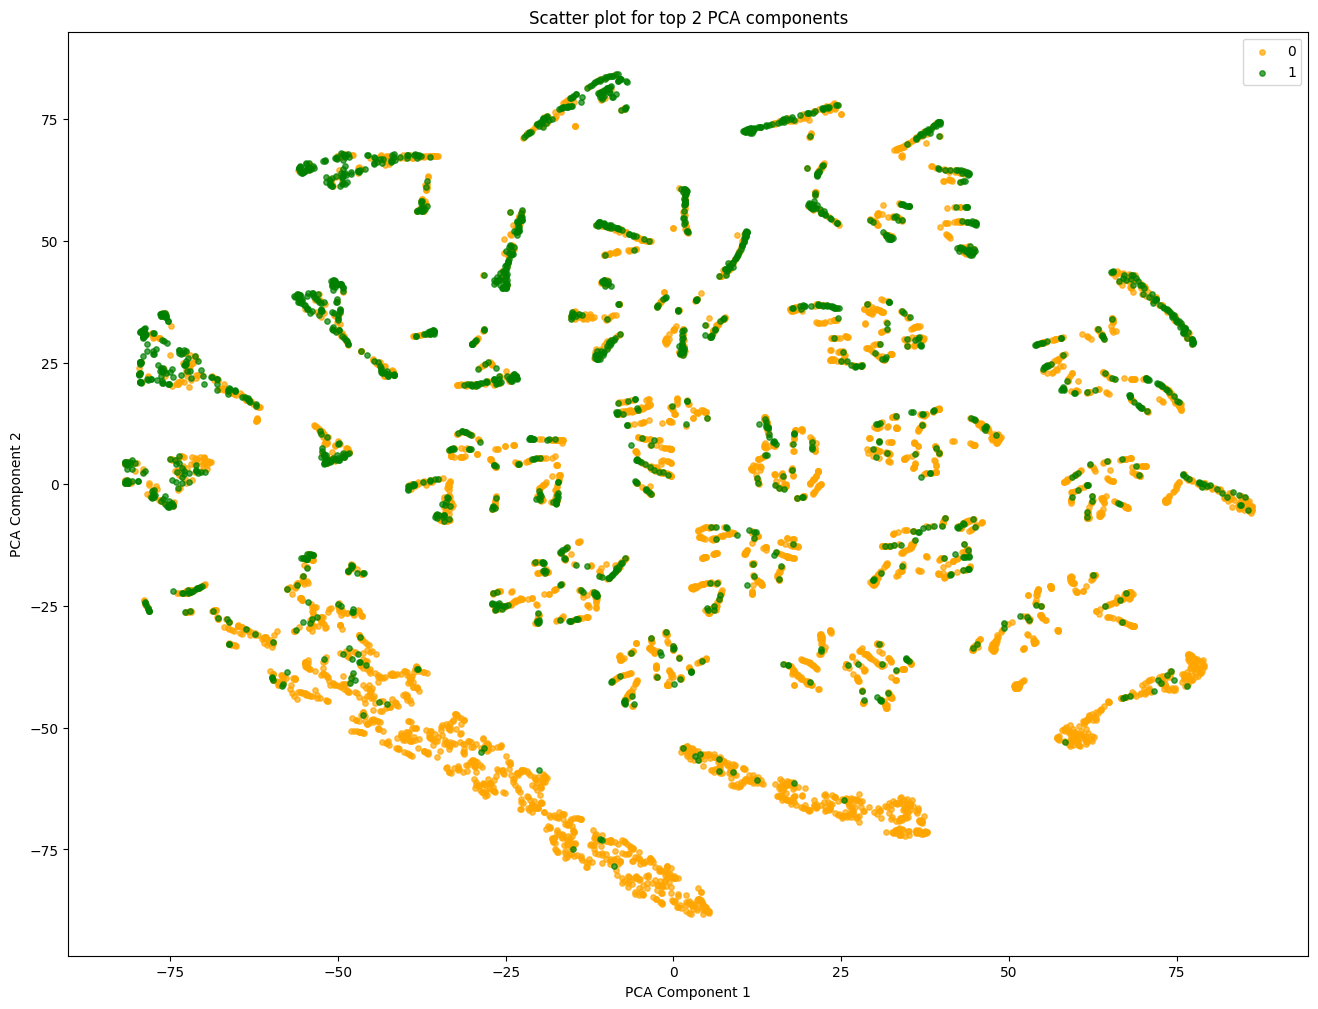

In [23]:
plt.figure(figsize=(16, 12))

for i in range (0,2):
    plt.scatter(X_red[y == i, 0], X_red[y == i, 1], color=colors[i], label= i, s = 15,alpha=0.7)

plt.title('Scatter plot for top 2 PCA components')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#Model Implementation

##Logistic regression

In [24]:
# Implementing logistic regression

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

#fitting model

logistic_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Predictions

logistic_pred_train = logistic_model.predict(X_train)
logistic_pred_test = logistic_model.predict(X_test)

In [26]:
# calculating metrics

#Type-I Error or False Positives: False Positives are the ones which are actually not fraud but the prediction said that they are fraud.
#Type-II Error or False Negatives: False Negatives are the ones which are actually fraud but the system said that they aren't.

#Well, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

#So, for Type-II Error, We can say that recall is the important metric.

# Importing the required metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

tn, fp, fn, tp = confusion_matrix(y_test, logistic_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix



,Predicted Fraud,Predicted Not Fraud
Fraud,223,171
Not Fraud,128,885


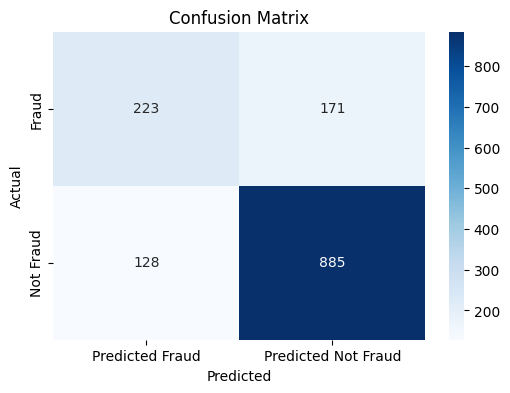

In [27]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [28]:
#Accuracy score

logistic_accuracy = accuracy_score(y_test, logistic_pred_test)
print('logistic_accuracy is',logistic_accuracy)


logistic_accuracy is 0.7874911158493249


In [29]:
#preicision

logistic_precision = precision_score(y_test, logistic_pred_test)
print('logistic_precision is',logistic_precision)

logistic_precision is 0.6353276353276354


In [30]:
#Recall score
logistic_recall_test = recall_score(y_test, logistic_pred_test)

# on train data to check overfitting ....model is not overfitting as delta is 0.45
logistic_recall_train = recall_score(y_train, logistic_pred_train)


print('logistic_recall_test is',logistic_recall_test)
print('logistic_recall_train is',logistic_recall_train)


logistic_recall_test is 0.565989847715736
logistic_recall_train is 0.5525423728813559


In [31]:
# F1-score

logistic_f1 = f1_score(y_test, logistic_pred_test)
print('logistic_f1 is',logistic_f1)


logistic_f1 is 0.5986577181208054


In [32]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, logistic_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1013
           1       0.64      0.57      0.60       394

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

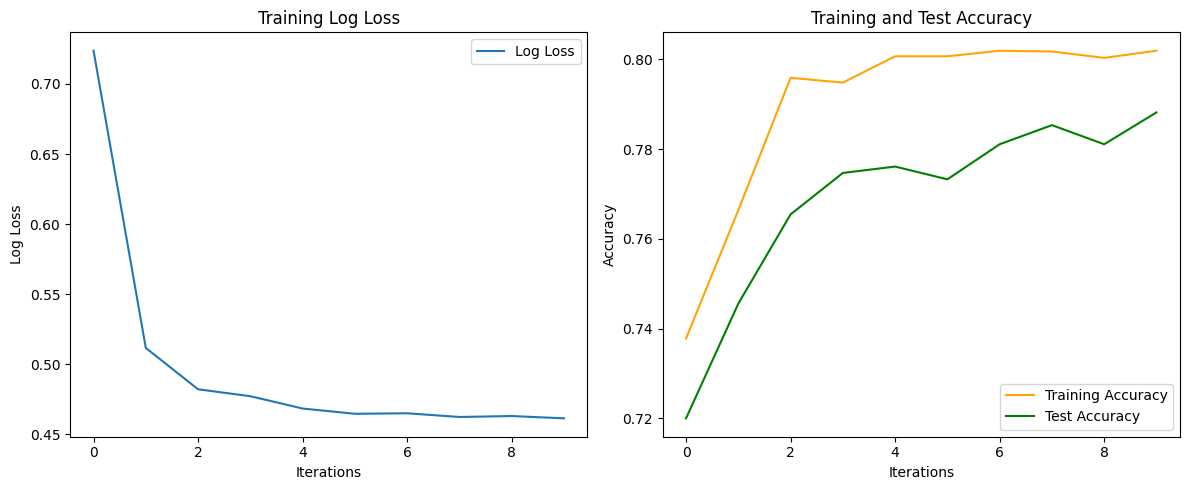

In [33]:
#Loss and accuracy curves
# Make predictions on the test set
from sklearn.metrics import accuracy_score, log_loss

# Train a logistic regression model with partial_fit
model = LogisticRegression(max_iter=1, warm_start=True)
num_iterations = 10  # You can adjust the number of iterations

loss_values = []
train_accuracies = []
test_accuracies = []

for i in range(num_iterations):
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate accuracy and log loss
    accuracy = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)

    # Store values for plotting
    loss_values.append(logloss)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy)

# Plot the loss and accuracy over iterations
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(np.arange(num_iterations), loss_values, label='Log Loss')
plt.title('Training Log Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.arange(num_iterations), train_accuracies, label='Training Accuracy', color='orange')
plt.plot(np.arange(num_iterations), test_accuracies, label='Test Accuracy', color='green')
plt.title('Training and Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
# ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

#Now, for the ROC Curve, we need the probabilites of Fraud happening (which is the probability of occurance of 1)

logistic_pred_test_prob = logistic_model.predict_proba(X_test)[:, 1]

#ROC curve
fpr, tpr, threshold = roc_curve(y_test, logistic_pred_test_prob)

#AUC score
logistic_auc = roc_auc_score(y_test, logistic_pred_test_prob)
print('logistic_auc score is',logistic_auc)


logistic_auc score is 0.8259955602547592


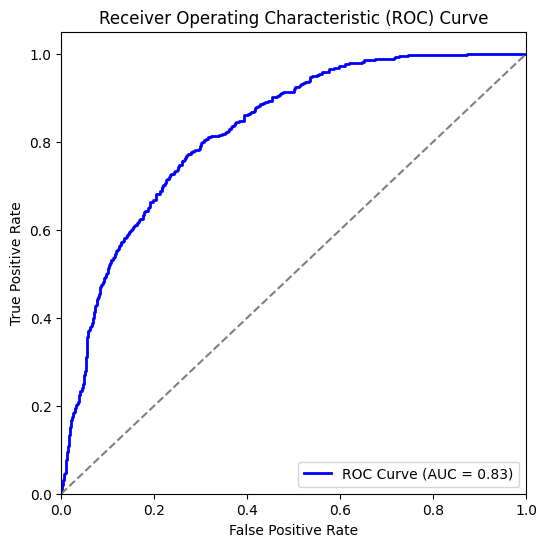

In [35]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {logistic_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()






##Logistic regression on 2nd degree polynomials

In [36]:
# Increasing model complexity to attain high metric scores by training logistic regression model on 2nd degree polynomials

from sklearn.preprocessing import PolynomialFeatures

# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(X_train_poly, y_train)

# Getting the probabilities
train_prob = model.predict_proba(X_train_poly)[:, 1]
test_prob = model.predict_proba(X_test_poly)[:, 1]

# Computing the ROC Score
print('roc_auc_score(y_train, train_prob) is',roc_auc_score(y_train, train_prob))
print(' roc_auc_score(y_test, test_prob) is', roc_auc_score(y_test, test_prob))



roc_auc_score(y_train, train_prob) is 0.8711715744333265
 roc_auc_score(y_test, test_prob) is 0.8177173896703264


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
logistic_auc_comp = roc_auc_score(y_test, test_prob)
print('logistic_auc_comp is',logistic_auc_comp)

logistic_auc_comp is 0.8177173896703264


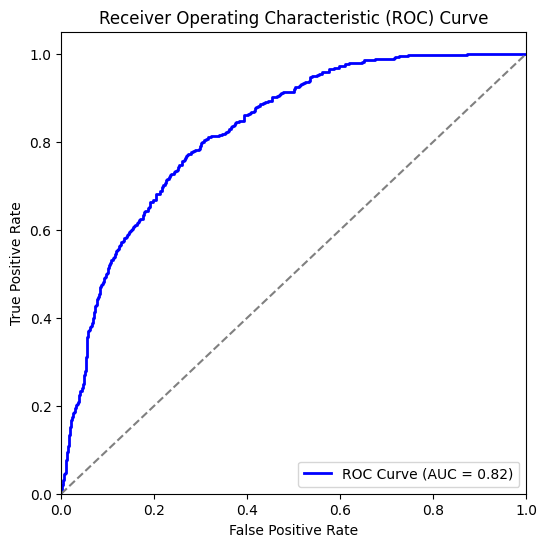

In [38]:
#ROC curve for test data

fpr_poly, tpr_poly, threshold_poly = roc_curve(y_test, test_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {logistic_auc_comp:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
# Recall score for complex model
# Recall_score is decreased when model is made complex

print('recall_score for complex model is',recall_score(y_test, model.predict(X_test_poly)))

recall_score for complex model is 0.5380710659898477


##SVM

###Linear SVM

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, roc_curve, auc

In [41]:
svm_model = SVC(kernel='linear', probability=True)

In [42]:
param_grid = {'C': [0.1, 1, 10, 100]}

In [43]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='roc_auc', verbose=2)

In [44]:
best_params = grid_search.best_params_
best_params

{'C': 0.1}

In [45]:
best_svm_model = SVC(kernel='linear', C=best_params['C'], probability=True)
best_svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [46]:
y_pred = best_svm_model.predict(X_test)
y_prob = best_svm_model.predict_proba(X_test)[:, 1]

In [47]:
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

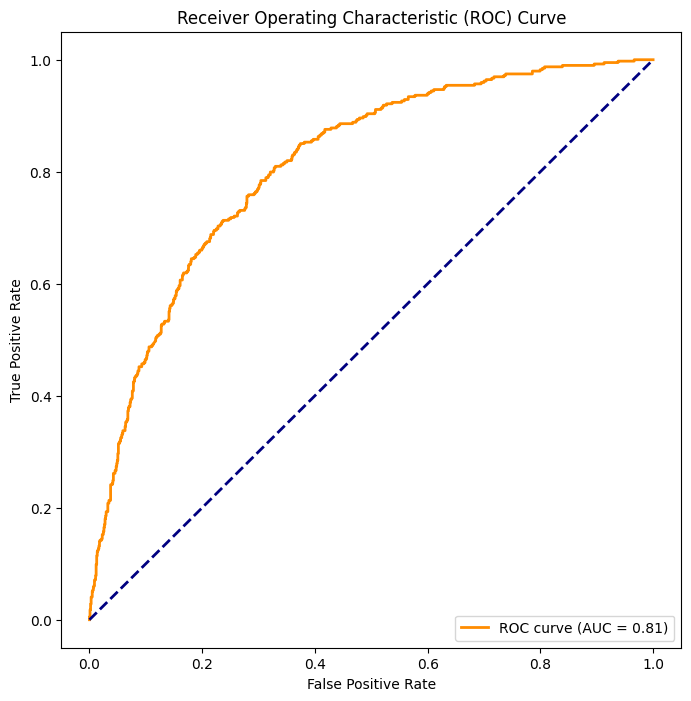

Accuracy: 0.7719
Best Hyperparameters: {'C': 0.1}
AUC: 0.8104
Recall: 0.5102
Confusion Matrix:
[[885 128]
 [193 201]]


In [49]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

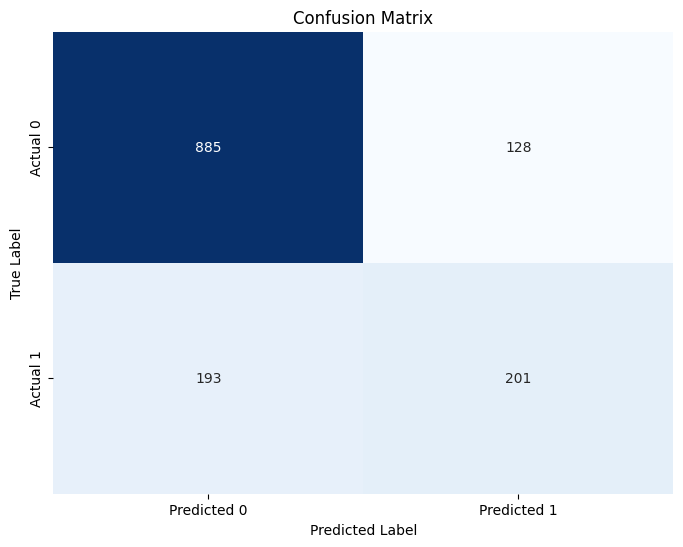

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, hinge_loss, accuracy_score

In [52]:
clf = SGDClassifier(loss='hinge', alpha=0.01, max_iter=100, random_state=42)

In [53]:
losses = []
dec_function_values = []
accuracies = []

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

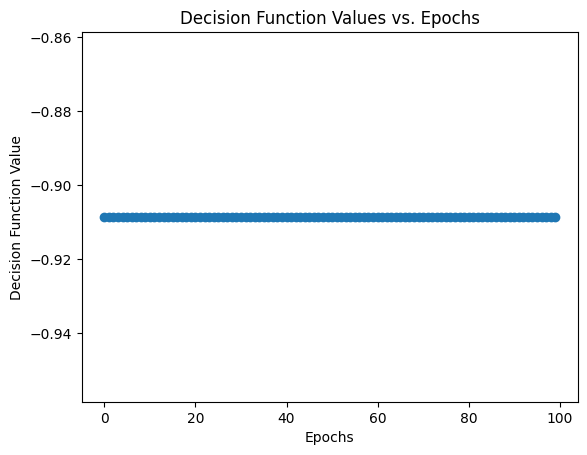

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification



# Create an instance of the model
model = LinearSVC(loss='hinge', max_iter=100, random_state=42)

# Lists to store decision function values
decision_values = []

# Training loop to visualize decision function values over epochs
for epoch in range(100):
    model.fit(X_train, y_train)

    # Decision function values on a subset of the training data (for visualization)
    decision_value = model.decision_function(X_train[:50])  # Adjust the subset size as needed
    decision_values.append(np.mean(decision_value))

# Plot the results
plt.plot(decision_values, marker='o')
plt.title('Decision Function Values vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Decision Function Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

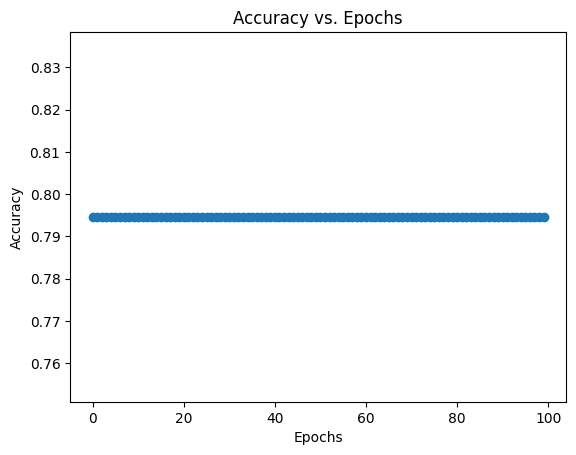

In [127]:
# Create an instance of the model
model = LinearSVC(loss='hinge', max_iter=100, random_state=42)

# Lists to store accuracy values
accuracy_values = []

# Training loop to visualize accuracy over epochs
for epoch in range(100):
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the results
plt.plot(accuracy_values, marker='o')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

###SVM using higher degree polynomials

In [55]:
svm_model = SVC(kernel='poly', probability=True)

In [56]:
param_grid = {'C': [0.1, 1, 10],
              'degree': [2, 3, 4]}

In [57]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(kernel='poly', probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4]},
             scoring='roc_auc', verbose=2)

In [58]:
best_params = grid_search.best_params_
best_params

{'C': 0.1, 'degree': 2}

In [59]:
best_svm_model = SVC(kernel='poly', C=best_params['C'], degree=best_params['degree'], probability=True)
best_svm_model.fit(X_train, y_train)

SVC(C=0.1, degree=2, kernel='poly', probability=True)

In [60]:
y_pred = best_svm_model.predict(X_test)
y_prob = best_svm_model.predict_proba(X_test)[:, 1]

In [61]:
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Accuracy: 0.7783
Best Hyperparameters: {'C': 0.1, 'degree': 2}
AUC: 0.8026
Recall: 0.4264
Confusion Matrix:
[[927  86]
 [226 168]]


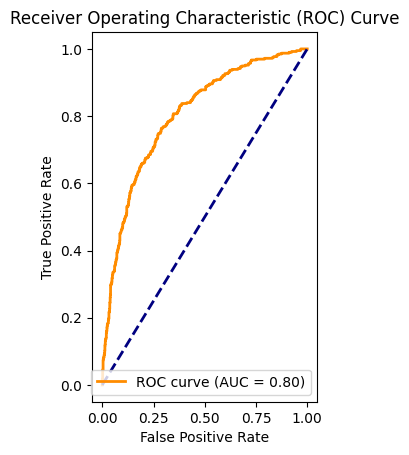

In [63]:
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
print(f"Accuracy: {accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

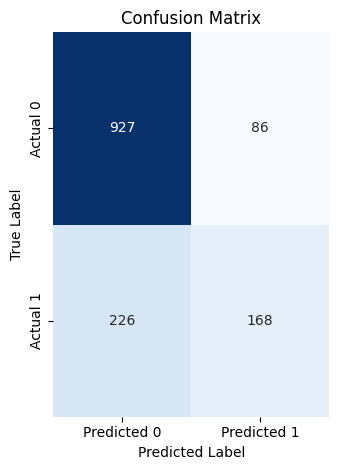

In [64]:
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [65]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import hinge_loss, accuracy_score

In [66]:
# Polynomial features
poly_degree = 3
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [67]:
# Initialize an SGDClassifier with a polynomial SVM loss
clf = SGDClassifier(loss='hinge', alpha=0.01, max_iter=100, random_state=42)

In [68]:
# Variables to store data for plotting
losses = []
dec_function_values = []
accuracies = []

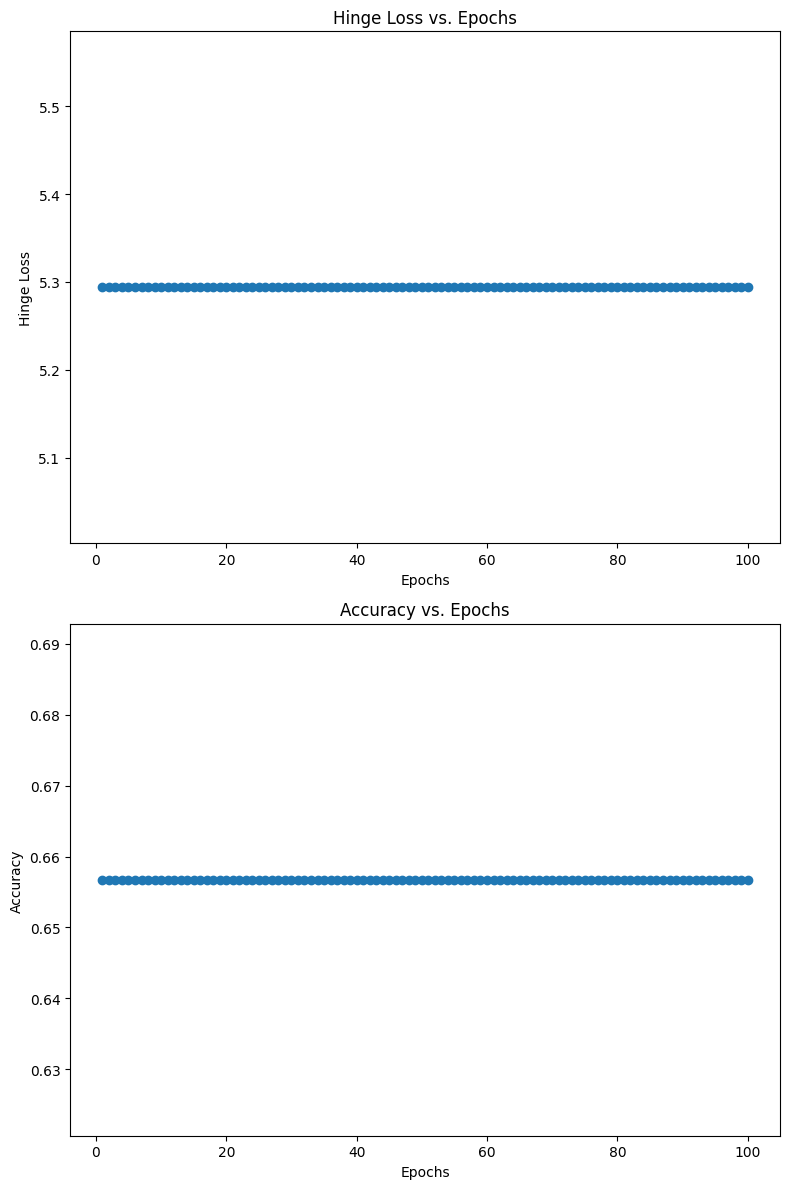

In [69]:
# Training loop
for epoch in range(1, clf.max_iter + 1):
    clf.partial_fit(X_train_poly, y_train, classes=np.unique(y_train))

    # Calculate hinge loss
    loss = hinge_loss(y_test, clf.decision_function(X_test_poly))
    losses.extend([loss] * len(y_test))

    # Calculate accuracy
    y_pred = clf.predict(X_test_poly)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.extend([accuracy] * len(y_test))

# Plotting
epochs = range(1, clf.max_iter + 1)  # Ensure consistent length for x-axis

fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot hinge loss
axs[0].plot(epochs, losses[:len(epochs)], marker='o')  # Trim the lengths to match epochs
axs[0].set_title('Hinge Loss vs. Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Hinge Loss')

# Plot accuracy
axs[1].plot(epochs, accuracies[:len(epochs)], marker='o')  # Trim the lengths to match epochs
axs[1].set_title('Accuracy vs. Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

###SVM using rbf kernel

In [70]:
svm_model = SVC(kernel='rbf', probability=True)

In [71]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [72]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc', verbose=2)

In [73]:
best_params = grid_search.best_params_
best_params

{'C': 10, 'gamma': 0.001}

In [74]:
best_svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], probability=True)
best_svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.001, probability=True)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Accuracy: 0.7790
Best Hyperparameters: {'C': 10, 'gamma': 0.001}
AUC: 0.8026
Recall: 0.5812
Confusion Matrix:
[[867 146]
 [165 229]]


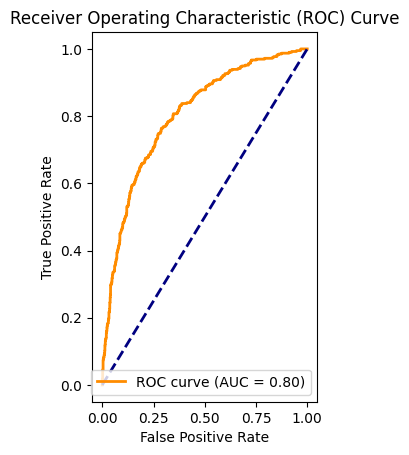

In [77]:
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
print(f"Accuracy: {accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

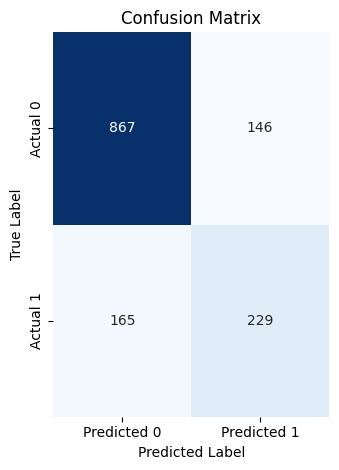

In [78]:
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [79]:
# Initialize an SVC with RBF kernel
c_value = 10
gamma_value = 0.001
clf = SVC(C=c_value, kernel='rbf', gamma=gamma_value, random_state=42)

In [80]:
# Variables to store data for plotting
losses = []
dec_function_values = []
accuracies = []

In [81]:
# Training loop
clf.fit(X_train, y_train)

SVC(C=10, gamma=0.001, random_state=42)

In [82]:
# Calculate hinge loss
loss = hinge_loss(y_test, clf.decision_function(X_test))
losses = [loss] * len(y_test)

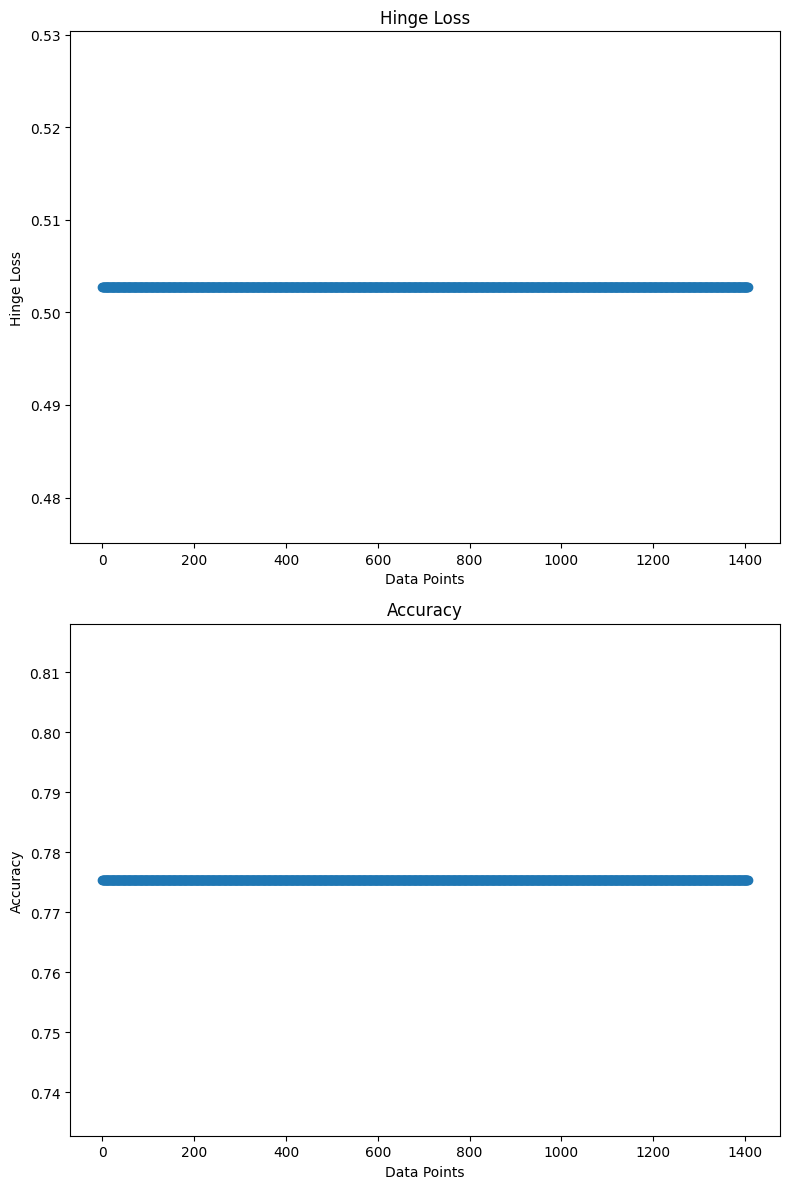

In [83]:
# Decision function values
dec_function_values_epoch = clf.decision_function(X_test)
dec_function_values = [np.mean(dec_function_values_epoch)] * len(y_test)

# Calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies = [accuracy] * len(y_test)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot hinge loss
axs[0].plot(range(len(y_test)), losses, marker='o')
axs[0].set_title('Hinge Loss')
axs[0].set_xlabel('Data Points')
axs[0].set_ylabel('Hinge Loss')

# Plot accuracy
axs[1].plot(range(len(y_test)), accuracies, marker='o')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Data Points')
axs[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


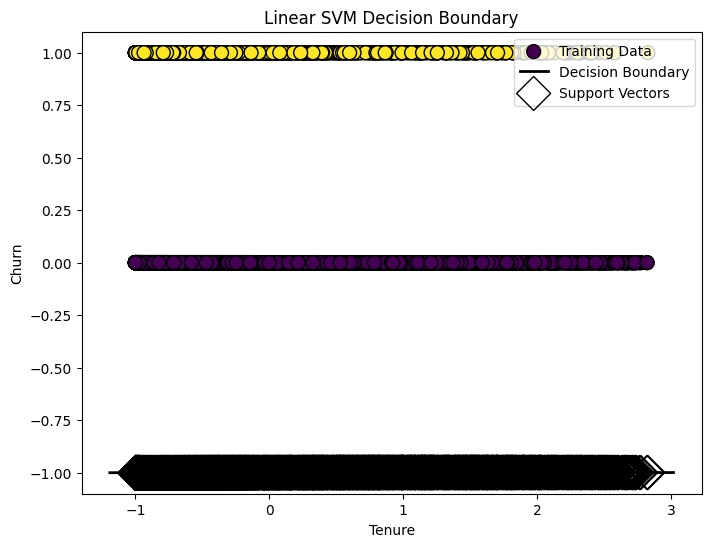

In [84]:
tenure_train = X_train[['TotalCharges']]
tenure_test = X_test[['TotalCharges']]


svm_model = SVC(kernel='rbf' , C=0.1, gamma = 0.01)
svm_model.fit(tenure_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(tenure_train, y_train, c=y_train, cmap='viridis', edgecolors='k', marker='o', s=100, label='Training Data')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a range of values for the decision boundary plot
xx = np.linspace(xlim[0], xlim[1], 100).reshape(-1, 1)

# Calculate the decision boundary
decision_boundary = svm_model.decision_function(xx)

# Plot decision boundary and margins
plt.plot(xx, decision_boundary, color='k', linestyle='-', linewidth=2, label='Decision Boundary')

# Highlight the support vectors
plt.scatter(tenure_train, svm_model.decision_function(tenure_train), s=300, facecolors='none', edgecolors='k', marker='D', label='Support Vectors')

# Label the plot
plt.title('Linear SVM Decision Boundary')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.legend()
plt.show()

##Linear Discriminant Analysis (LDA)

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
lda_model = LinearDiscriminantAnalysis()

In [96]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [97]:
# Make predictions on the test set
y_pred = lda_model.predict(X_test)
y_prob = lda_model.predict_proba(X_test)[:, 1]

In [98]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [99]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

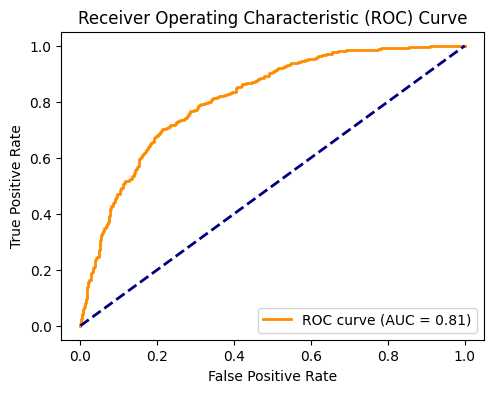

In [100]:
plt.figure(figsize=(12, 4))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

In [101]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, roc_curve, confusion_matrix

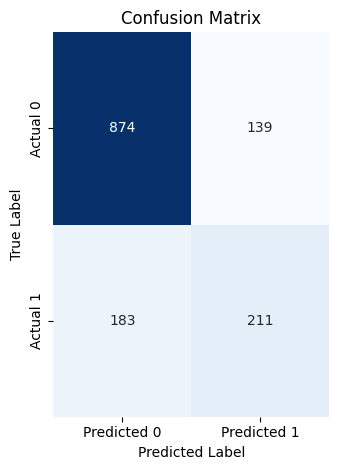

Accuracy: 0.7711
AUC: 0.8141
Recall: 0.5355
Confusion Matrix:
[[874 139]
 [183 211]]


In [102]:
# Visualize the confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

##K-Nearest Neighbours (KNN)

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns

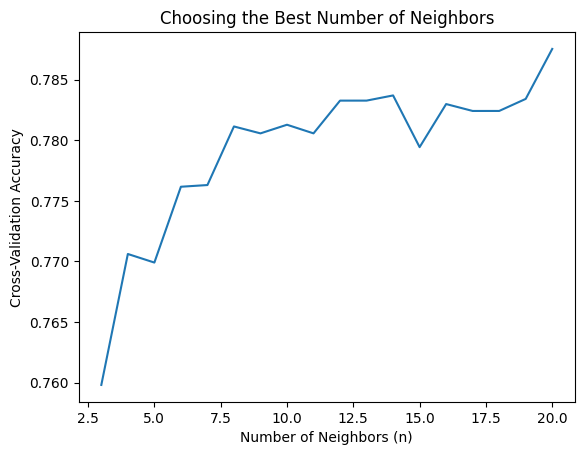

The optimal number of neighbors is 20


In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming you have a dataset 'X' containing features and 'y' containing labels (fraudulent or not)
# Replace this with your actual dataset loading code
# X, y = load_your_dataset()

# Define a range of values for 'n' (number of neighbors) to try
neighbors = list(range(3, 21))

# Empty list to store cross-validation scores
cv_scores = []

# Perform 10-fold cross-validation for each value of 'n'
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # You can use other metrics like precision, recall, etc.
    cv_scores.append(scores.mean())

# Find the optimal 'n' that gives the highest cross-validation score
optimal_n = neighbors[cv_scores.index(max(cv_scores))]

# Plotting the accuracy vs. 'n' to visualize the results
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Choosing the Best Number of Neighbors')
plt.show()

print("The optimal number of neighbors is {}".format(optimal_n))

In [105]:
knn=KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
knn.fit(X_train,y_train)
print('Accuracy of KNN n=20 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))

Accuracy of KNN n=20 on the testing dataset is :0.770


In [106]:
y_pred_KNN =knn.predict(X_test)

In [107]:
y_prob = knn.predict_proba(X_test)[:, 1]

In [108]:
print('Accuracy Score - KNN :', metrics.accuracy_score(y_test, y_pred_KNN))
print('Average Precision - KNN :', metrics.average_precision_score(y_test, y_pred_KNN))
print('F1 Score - KNN :', metrics.f1_score(y_test, y_pred_KNN))
print('Precision - KNN :', metrics.precision_score(y_test, y_pred_KNN))
print('Recall - KNN :', metrics.recall_score(y_test, y_pred_KNN))
print('AUC Score - KNN :', metrics.roc_auc_score(y_test, y_prob))

Accuracy Score - KNN : 0.7704335465529495
Average Precision - KNN : 0.4400383903185271
F1 Score - KNN : 0.5365853658536585
Precision - KNN : 0.6171617161716172
Recall - KNN : 0.4746192893401015
AUC Score - KNN : 0.7960084886325485


In [109]:
 metrics.confusion_matrix(y_test, y_pred_KNN)

array([[897, 116],
       [207, 187]])

In [110]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

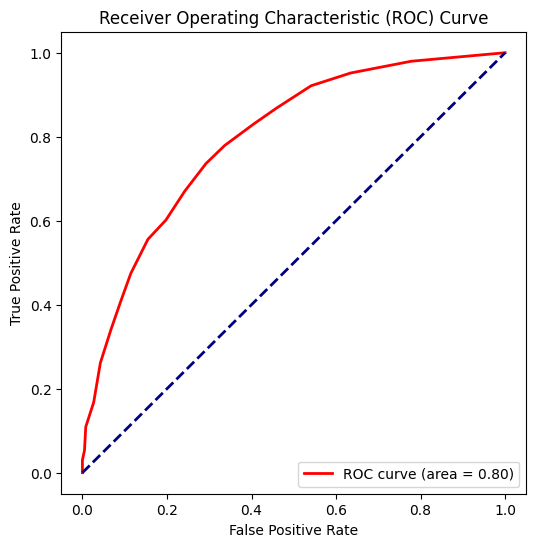

In [111]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

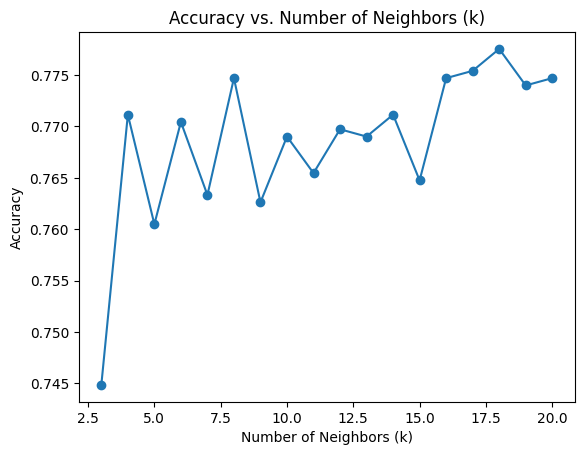

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

 # Define a range of values for k
k_values = range(3, 21)

# Lists to store accuracy values for each k
accuracy_values = []

# Iterate over different values of k
for k in k_values:
    # Create KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the results
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

##User interface

In [12]:
pip install gradio typing-extensions==3.10.0.0


  Using cached typing_extensions-3.10.0.0-py3-none-any.whl (26 kB)
INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
  Using cached gradio-4.4.1-py3-none-any.whl (15.4 MB)
  Using cached gradio-4.4.0-py3-none-any.whl (15.4 MB)
  Using cached gradio-4.3.0-py3-none-any.whl (15.4 MB)
  Using cached gradio-4.2.0-py3-none-any.whl (15.4 MB)
  Using cached gradio-4.1.2-py3-none-any.whl (15.4 MB)
  Using cached gradio-4.1.1-py3-none-any.whl (15.4 MB)
  Using cached gradio-4.1.0-py3-none-any.whl (15.4 MB)
INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
  Using cached gradio-4.0.2-py3-none-any.whl (25.3 MB)
  Using cached gradio-4.0.1-py3-none-any.whl (25.3 MB)
  Using cached gradio-4.0.0-py3-none-any.whl (25.3 MB)
  Using cached gradio-3.50.2-py3-none-any.whl (20.3 MB)
  Using cached gradio_client-0.6.1-py3-no

In [13]:
pip install gradio --upgrade typing-extensions

  Using cached gradio-4.5.0-py3-none-any.whl (16.5 MB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Using cached gradio_client-0.7.0-py3-none-any.whl (302 kB)
  Using cached pydantic-2.5.1-py3-none-any.whl (381 kB)
INFO: pip is looking at multiple versions of fastapi to determine which version is compatible with other requirements. This could take a while.
  Using cached fastapi-0.104.1-py3-none-any.whl (92 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.9.2
    Uninstalling pydantic-1.9.2:
      Successfully uninstalled pydantic-1.9.2
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.2.9
    Uninstalling gradio_client-0.2.9:
      Successfully uninstalled gradio_client-0.2.9
  Attempting uninst

In [14]:
import gradio as gr

In [15]:


data = data.drop('customerID', axis=1)
data.head()

#Normalizing ordinal categorical by label encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_enc = LabelEncoder()
data['Dependents'] = label_enc.fit_transform(data['Dependents'].astype(str))
data['Partner'] = label_enc.fit_transform(data['Partner'].astype(str))
data['PhoneService'] = label_enc.fit_transform(data['PhoneService'].astype(str))
data['PaperlessBilling'] = label_enc.fit_transform(data['PaperlessBilling'].astype(str))
data['Churn'] = label_enc.fit_transform(data['Churn'].astype(str))
data['MultipleLines'] = label_enc.fit_transform(data['MultipleLines'].astype(str))
data['OnlineSecurity'] = label_enc.fit_transform(data['OnlineSecurity'].astype(str))
data['OnlineBackup'] = label_enc.fit_transform(data['OnlineBackup'].astype(str))
data['DeviceProtection'] = label_enc.fit_transform(data['DeviceProtection'].astype(str))
data['TechSupport'] = label_enc.fit_transform(data['TechSupport'].astype(str))
data['StreamingTV'] = label_enc.fit_transform(data['StreamingTV'].astype(str))
data['StreamingMovies'] = label_enc.fit_transform(data['StreamingMovies'].astype(str))

data.head()


#Normalizing nominal data by one hot encoder
from sklearn.preprocessing import OneHotEncoder
nominal_cols = ['gender','InternetService','Contract','PaymentMethod']

enc = OneHotEncoder(drop='first', sparse=False)
en_data = enc.fit_transform(data[nominal_cols])
en_columns = enc.get_feature_names_out(input_features=nominal_cols)
data_en = pd.DataFrame(en_data, columns=en_columns)
data_en

data_en_fin = pd.concat([data.drop(nominal_cols, axis=1), data_en], axis=1)
data_enco=data_en_fin.dropna()
data_enco.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,2,0,0,...,29.85,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,2,0,2,0,...,1889.5,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,2,2,0,0,...,108.15,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,2,0,2,2,...,1840.75,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
data_enco.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
gender_Male                              float64
InternetService_Fiber optic              float64
InternetService_No                       float64
Contract_One year                        float64
Contract_Two year   

In [17]:
data_enco['TotalCharges'] = pd.to_numeric(data_enco['TotalCharges'], errors='coerce')
data_enco=data_enco.dropna()

In [18]:
print("Instructions to provide input are as follows:-\n\n"
"-> Input to nummerical features can be in integers/decimals.\n\n"
"-> Input to checkbox entries is in default form yes/no and If a entry name is not present then on leaving the checkbox blank it will by default consider that.\n\n"
"-> Input for Multiple Lines are:-\n"
"# NO- 0, No phone- 1, yes-2 \n\n"
"->Input for Online Security, Online backup, Device protection, Tech support, Streaming TV, Streaming Movies are:-\n"
"# No-0, No internet service-1, yes-2"
)

Instructions to provide input are as follows:-

-> Input to nummerical features can be in integers/decimals.

-> Input to checkbox entries is in default form yes/no and If a entry name is not present then on leaving the checkbox blank it will by default consider that.

-> Input for Multiple Lines are:-
# NO- 0, No phone- 1, yes-2 

->Input for Online Security, Online backup, Device protection, Tech support, Streaming TV, Streaming Movies are:-
# No-0, No internet service-1, yes-2


In [19]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data_enco.drop('Churn', axis=1)
y = data_enco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


def fraud_prediction(SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup,
              DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges,
              TotalCharges, gender_Male, InternetService_Fiber_optic, InternetService_No,
              Contract_One_year, Contract_Two_year, PaymentMethod_Credit_card_automatic,
              PaymentMethod_Electronic_check, PaymentMethod_Mailed_check):

    # Convert input features to a 2D array
    input_features = [[SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity,
                       OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling,
                       MonthlyCharges, TotalCharges, gender_Male, InternetService_Fiber_optic,
                       InternetService_No, Contract_One_year, Contract_Two_year,
                       PaymentMethod_Credit_card_automatic, PaymentMethod_Electronic_check, PaymentMethod_Mailed_check]]

    # Make predictions with the logistic regression model
    prediction = model.predict_proba(input_features)
    fraud_probability = prediction[:, 1][0]

    return f"Fraud Probability: {fraud_probability:.2%}"

# Create the Gradio interface
iface = gr.Interface(fn=fraud_prediction, inputs=[
                         gr.Number(label="SeniorCitizen"),
                         gr.Checkbox(label="Partner"),
                         gr.Checkbox(label="Dependents" ),
                         gr.Number(label="tenure" ),
                         gr.Checkbox(label="PhoneService" ),
                         gr.Number(label="MultipleLines" ),
                         gr.Number(label="OnlineSecurity" ),
                         gr.Number(label="OnlineBackup" ),
                         gr.Number(label="DeviceProtection" ),
                         gr.Number(label="TechSupport" ),
                         gr.Number(label="StreamingTV" ),
                         gr.Number(label="StreamingMovies" ),
                         gr.Checkbox(label="PaperlessBilling" ),
                         gr.Number(label="MonthlyCharges" ),
                         gr.Number(label="TotalCharges" ),

                         gr.Checkbox(label="gender_Male" ),
                         gr.Checkbox(label="InternetService_Fiber_optic" ),
                         gr.Checkbox(label="InternetService_No" ),
                         gr.Checkbox(label="Contract_One_year" ),
                         gr.Checkbox(label="Contract_Two_year" ),
                         gr.Checkbox(label="PaymentMethod_Credit_card_automatic" ),
                         gr.Checkbox(label="PaymentMethod_Electronic_check" ),
                         gr.Checkbox(label="PaymentMethod_Mailed_check" )
                     ],
                     outputs=gr.Textbox(label="Prediction"))

# Launch the interface
iface.launch()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e750bd3670874574eb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
